# Logistic regression

## Logistic regression model
$ h_\theta(x) = g(\theta^{\intercal}x) $

where: $ g(z) = \frac{1}{1+e^{-z}} $; $z = \theta^{\intercal}x $

$ h_\theta(x) = \frac{1}{1+e^{-\theta^{\intercal}x}} $

## Cost function (with regularization)
$ J(\theta) = \frac{1}{m} \sum_{i=1}^{m} [-y^{(i)}log(h_\theta(x^{(i)})) - (1 - y^{(i)})log(1 - h_\theta(x^{(i)}))] + \frac{\lambda}{2m}\sum_{j=1}^{n}\theta_j^2$

## Gradient descent (with regularization)

repeat until convergence {

>$ \theta_j = \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta) $

}

$ \frac{\partial}{\partial \theta_0} J(\theta) = \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)} $ for j = 0 

$ \frac{\partial}{\partial \theta_j} J(\theta) = ( \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)} ) + \frac{\lambda}{m} \theta_j $ for j >= 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

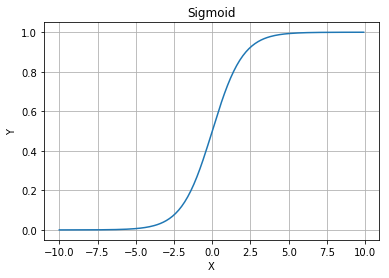

In [2]:
def sigmoid(x):
    return 1.0 / (1 + np.exp(-1 * x))

x = [0.1 * x for x in xrange(-100, 100)]
y = map(sigmoid, x)

plt.plot(x, y)

plt.grid(True)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Sigmoid')
plt.show()

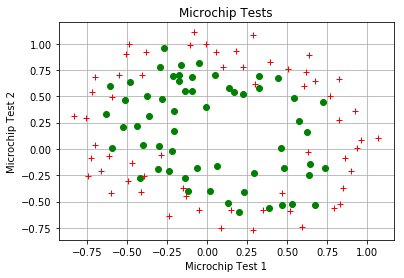

In [3]:
data = np.loadtxt('microchip_tests.csv', delimiter=',')

# Filter data based on last column value
passed = data[np.where(data[:,2] == 1)]
failed = data[np.where(data[:,2] == 0)]

plt.plot(passed[:, 0], passed[:, 1], 'go')
plt.plot(failed[:, 0], failed[:, 1], 'r+')

plt.grid(True)
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.title('Microchip Tests')
plt.show()